# TASK 1: Fuzzy Search Algorthms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Having imported some of the important libraries

let us import the data given in the task as an excel file and store it in a list.

In [2]:
df = pd.read_excel('TaskData.xlsx', header = None) # Store the excel file in the same folder as the ipynb file
data = df.values.tolist()

Now, let us make three dictionaries (for three different fuzzy search algorithms) consisting of 10 entries each being assigned to a specific profession on the list and assigning a value of zero to it.

In [3]:
perm_dic_1 = {
    'Doctor' : 0,
    'Lawyer' : 0,
    'Teacher' : 0 ,
    'Engineer' : 0,
    'Accountant' : 0,
    'Nurse' : 0,
    'Police' : 0,
    'Architect' : 0,
    'Dentist' : 0,
    'Pharmacist' : 0}
perm_dic_2 = {
    'Doctor' : 0,
    'Lawyer' : 0,
    'Teacher' : 0 ,
    'Engineer' : 0,
    'Accountant' : 0,
    'Nurse' : 0,
    'Police' : 0,
    'Architect' : 0,
    'Dentist' : 0,
    'Pharmacist' : 0}
perm_dic_3 = {
    'Doctor' : 0,
    'Lawyer' : 0,
    'Teacher' : 0 ,
    'Engineer' : 0,
    'Accountant' : 0,
    'Nurse' : 0,
    'Police' : 0,
    'Architect' : 0,
    'Dentist' : 0,
    'Pharmacist' : 0}
print(perm_dic_1)
print(perm_dic_2)
print(perm_dic_3)

{'Doctor': 0, 'Lawyer': 0, 'Teacher': 0, 'Engineer': 0, 'Accountant': 0, 'Nurse': 0, 'Police': 0, 'Architect': 0, 'Dentist': 0, 'Pharmacist': 0}
{'Doctor': 0, 'Lawyer': 0, 'Teacher': 0, 'Engineer': 0, 'Accountant': 0, 'Nurse': 0, 'Police': 0, 'Architect': 0, 'Dentist': 0, 'Pharmacist': 0}
{'Doctor': 0, 'Lawyer': 0, 'Teacher': 0, 'Engineer': 0, 'Accountant': 0, 'Nurse': 0, 'Police': 0, 'Architect': 0, 'Dentist': 0, 'Pharmacist': 0}


In [4]:
ref = ['Doctor','Lawyer','Teacher','Engineer','Accountant','Nurse','Police','Architect','Dentist','Pharmacist']
print(ref)

['Doctor', 'Lawyer', 'Teacher', 'Engineer', 'Accountant', 'Nurse', 'Police', 'Architect', 'Dentist', 'Pharmacist']


The **goal** is to run through each entry in the data list and put it through 3 individual fuzzy search algorithms.
We will then compare the results obtained from each algorithms in the form of a bar chart and its time efficiency and rank them from best to worse.
The **three algorithms** I will be using are:
1. Levenshtein Algorithm
2. Bitap Algorithm
3. N-gram (along with Jacoord Similarity)

The estimated results from the three algorithms will be stored in the above three dictionaries.

Let us first start with the Levenshtein algorithm

In [5]:
def levenshtein(s, t):
    rows = len(s)+1
    cols = len(t)+1
    dist = [[0 for x in range(cols)] for x in range(rows)]

    #unnecessary source characters can be removed through deletion
    for i in range(1, rows):
        dist[i][0] = i

    #necessary target characters can be added through insertion
    for i in range(1, cols):
        dist[0][i] = i
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]: #replacement criteria
                cost = 0
            else:
                cost = 1                                    # as per the 4-cell diagram below
            dist[row][col] = min(dist[row-1][col] + 1,      # deletion 
                                 dist[row][col-1] + 1,      # insertion
                                 dist[row-1][col-1] + cost) # replacement

 
    return dist[row][col] #the last cell (bottom-right)

The levenshtein algorithm is written using principles of recursion, in which the text can follow one of three 'edits' to change the first word to the second word. The three possible edits are:
1. Replacing a letter for another
2. Deleting a letter
3. Adding a new letter
Using these three edits, the number of steps it takes to reach the second word is known as the edit distance.
The lower the edit distance, the closer the given word (a) is to the target word (b).

The Levenshtein Algorithm works on the principle of recursively checking the outcome of these 3 possible edits on the first character, and thereby shortening the word, and finally returniong the minimum number of steps needed to achieve the goal.

The above code is an iterative and extremely fast method to caculate the edit distance between two words.
It involves setting the two given words up in a 2-d matrix and plotting the edit distances for words, one character at a time.

![matrix method](https://i.imgur.com/AKiTNLd.png)

So, we set up a matrix like the one above and perform levenstein operations, from left to right, top to bottom. The calculations in this method are moch faster than the basic recursive function as, we can find the value of a cell using the cell values before it.

![visualize](https://i.imgur.com/I1PQS4Q.png)

For example, if your newest character added on traversing left to right matches the letter to the left, you will not have to perform a replace operation and can directly take up the value of the cell directly behind it (the replace cell in the image above). OR else a value of 1 may be added. Similar logic can be applied to addition and deletion function.

In [6]:
def use_levenshtein (a:str, ref):
    lowest_edit_distance  = 50 #arbitrarily picked large number
    guessed_word = '' #placeholder for word
    for target in ref:
        x = levenshtein(a.lower(), target.lower())
        if x < lowest_edit_distance:
            lowest_edit_distance = x
            guessed_word = target
    # having obtained the word with the lowest Levenshtein distance will give us the most probable occupation
    return guessed_word

Having completed a function to completely implement the levenshtein function, we will now move on to the Bitap Algorithm and make a function for it.

In [7]:
def char_list(a:str):
    list = []
    for charac in a:
        if charac not in list:
            list.append(charac)
    return list

In [8]:
def character_array_dic(a:str):
    T= {}
    charac_list = char_list(a)
    for charac in charac_list:
        T[charac] = [0] * len(a)
        cnt = 0
        for i in range(len(a)):
            if charac != a[i]:
                T[charac][i] = 1
            else:
                T[charac][i] = 0
    return T

In [9]:
def left_shift(l):
    l = l[1:] + l[:1]
    l[-1]  = 0
    return l

In [10]:
def truth_table(a:list, b:list):
    l =[]
    for i in range(len(a)):
        l.append(int(a[i] | b[i]))
    return l

The above four funtions are necesaary to convert the words passed into the bitap funtions into truth table list of characters which are present. these lists will now be passed into the funtion to process the presence of a pattern.

The bitap algorithm works by continuously taking the **OR** of the given pattern (or word in this case) and compares it wiht the target pattern (word) to find any commonalities between the two.

A very simpplified explanation of its working is as follows:

![truth_table](https://miro.medium.com/v2/resize:fit:300/format:webp/1*v2ZsZcYWmCGyKTHtl9StWA.png "truth table")

Each character in the the final pattern will be assigned a truth table list of its own and all this is made by taking the initial pattern and reversing its character

>(HELLO --> OLLEH)

and in the truth table of specific character, the positions of that character will be taken as 0, while rest is 1.

Ex. Let **S0=‘ababc’** is the pattern to be matched with string **S1=‘abdabababc’**
This leads to 4 truth tables for a, b, c, d as shown in the above picture.

Now, an initial case of 11111 (X) will be taken (as per the 5 characters in the example above), and it will be left-shifted
> 11111 --> 11110

Then, the OR of this and the corresponding table of the first character in the final pattern will be taken (in this case it is a).

> 11110 | 11010 --> 11110

A pattern of left shiting and OR continues till the last character, and the accuracy or presence of the pattern is detected as a 0 character moves closer to the [0] position in the changing truth table (X).

In [11]:
def bitap (a:str, b:str):
    a = a[::-1] #reverses a string
    charac_list= char_list(a.lower())
    T= character_array_dic(a.lower())
    S = [1] * len(a)
    temp = S
    pattern_matcher = 50 # arbitrarily large number
    for charac in b.lower():
        if charac not in charac_list:
            temp = S
            continue
        temp = left_shift(temp)
        temp = truth_table(temp, T.get(charac))
        if 0 in temp:
            if pattern_matcher > temp.index(0):
                pattern_matcher = temp.index(0)
    return pattern_matcher

In [12]:
def use_bitap(a:str, ref):
    pattern_matcher = 50
    guessed_word = ''
    for target in ref:
        x = bitap(a, target)
        if x < pattern_matcher:
            pattern_matcher = x
            guessed_word = target
    # having obtained the word with the best bitap output, this will give us the most probable occupation
    return guessed_word

N gram similarity involves breaking the initial and target word into strings of varying sizes (n). It may be a bigram (2), or a trigram (3).
In this algorithm, I plan to break the words into monograms, bigrams and trigrams, and compare the resulting strings.

the n_gram_breaker funtion below will break the string into all possible strings of length 1, 2, 3.
after this we will take the ratio of the intersection (A ∩ B) and the union (A ∪ B) symbol to obtain a fraction. Greater common strings will lead to a higher fraction, and that is more likely to be the intended word.

In [13]:
def n_gram_breaker(a:str):
    l = []
    for i in range(len(a)):
        l.append(a[i])
        for j in range(i+1, len(a)):
            l.append(a[i] + a[j])
            for k in range(j+1, len(a)):
                l.append(a[i] + a[j] + a[k])
    return l

In [14]:
def n_gram(a:str, b:str):
    a = a.lower()
    b = b.lower()
    l = n_gram_breaker(a)
    l_ = n_gram_breaker(b)
    inter = list(set(l) & set(l_))  #applying Jaccord Similarity to the sets of all possible substrings of length 1, 2, 3
    union = list(set(l) | set(l_))
    return (len(inter) / len(union))

In [15]:
def use_n_gram(a:str, ref):
    cnt = 0 # initially set to the low value of 0
    guessed_word = ''
    for target in ref:
        x = n_gram(a, target)
        if x > cnt:
            cnt = x
            guessed_word = target
    # having obtained the word with the best bitap output, this will give us the most probable occupation
    return guessed_word

Now, that we have prepared the three algorithms, it is time to run all three algorithms on individuals entries of occupations on the list and tally the results.

In [16]:
%%time
for i in range(1406):
    word = data[i][0]
    add = use_levenshtein(word, ref)
    perm_dic_1[add] += 1
for keys in perm_dic_1:
    print(keys, perm_dic_1[keys])
print('\n')
name_1 = perm_dic_1.keys()
values_1 = perm_dic_1.values()

Doctor 225
Lawyer 82
Teacher 195
Engineer 328
Accountant 32
Nurse 85
Police 162
Architect 63
Dentist 192
Pharmacist 42


CPU times: total: 125 ms
Wall time: 289 ms


In [17]:
%%time
for i in range(1406):
    word = data[i][0]
    add = use_bitap(word, ref)
    perm_dic_2[add] += 1
for keys in perm_dic_2:
    print(keys, perm_dic_2[keys])
print('\n')
values_2 = perm_dic_2.values()

Doctor 228
Lawyer 82
Teacher 195
Engineer 333
Accountant 35
Nurse 80
Police 162
Architect 63
Dentist 186
Pharmacist 42


CPU times: total: 93.8 ms
Wall time: 126 ms


In [18]:
%%time
for i in range(1406):
    word = data[i][0]
    add = use_n_gram(word, ref)
    perm_dic_3[add] += 1
for keys in perm_dic_3:
    print(keys, perm_dic_3[keys])
print('\n')
values_3 = perm_dic_3.values()

Doctor 219
Lawyer 82
Teacher 201
Engineer 328
Accountant 32
Nurse 85
Police 162
Architect 63
Dentist 192
Pharmacist 42


CPU times: total: 328 ms
Wall time: 502 ms


Now, let us present the data obtained from the three different algorithms, side by side, in a bar graph to show a comparison between the three.

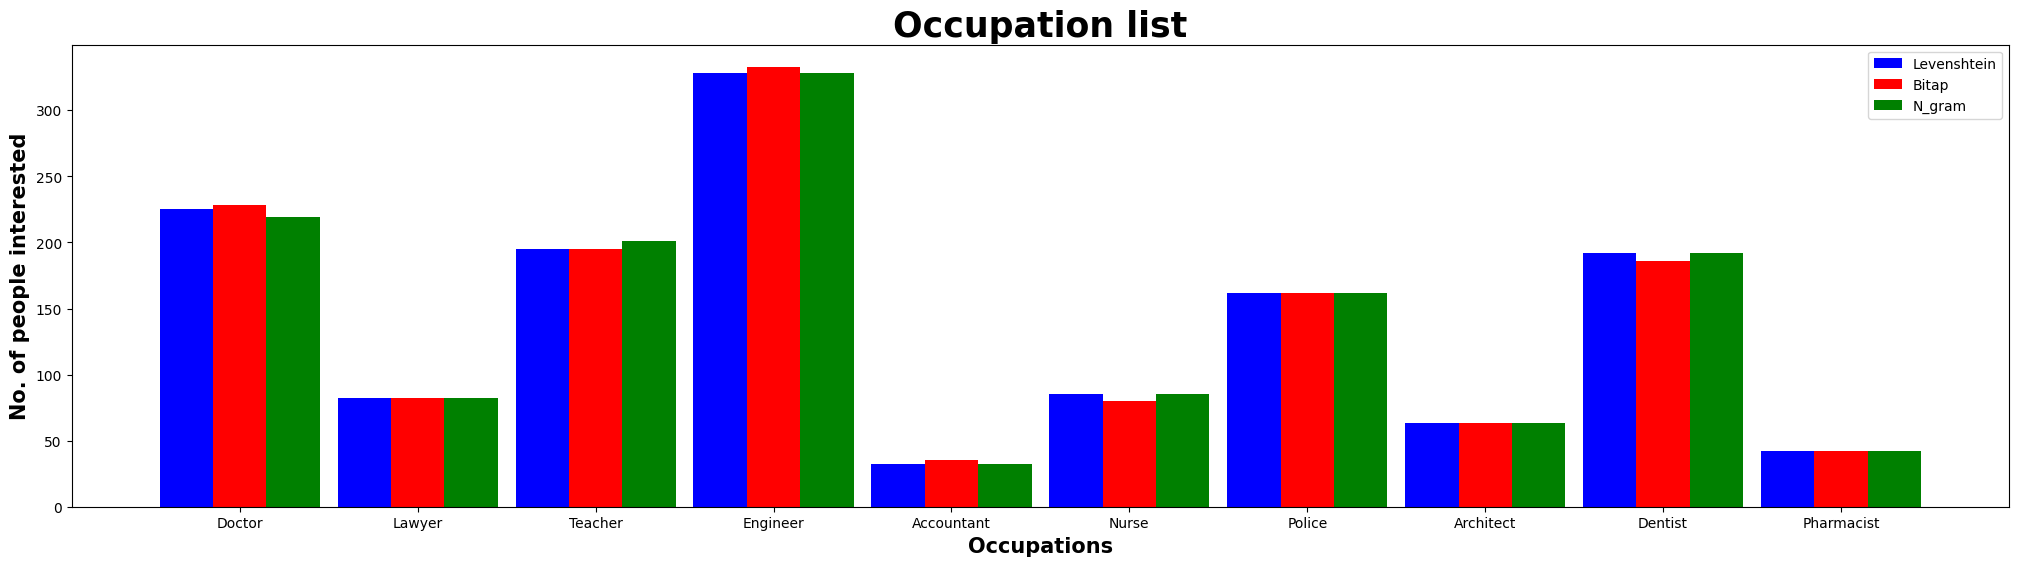

In [19]:
positions_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
positions_2 = [0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3]
positions_3 = [0.6, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6, 9.6]
plt.subplots(figsize =(25, 6))
plt.bar(positions_1, values_1, color ='blue', 
        width = 0.3, label ='Levenshtein')
plt.bar(positions_2, values_2, color ='red', 
        width = 0.3, label = 'Bitap')
plt.bar(positions_3, values_3, color ='green', 
        width = 0.3, label = 'N_gram')
plt.xticks(positions_2, name_1)
plt.xlabel("Occupations", fontweight ='bold', fontsize = 15)
plt.ylabel("No. of people interested", fontweight ='bold', fontsize = 15)
plt.title("Occupation list", fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

In [20]:
df = pd.DataFrame(list(zip(values_1, values_2, values_3)),
                    columns = ['Levenshtein', 'Bitap', 'N Gram'], index = name_1)
print(df)

            Levenshtein  Bitap  N Gram
Doctor              225    228     219
Lawyer               82     82      82
Teacher             195    195     201
Engineer            328    333     328
Accountant           32     35      32
Nurse                85     80      85
Police              162    162     162
Architect            63     63      63
Dentist             192    186     192
Pharmacist           42     42      42


- From the above table, we can see that the bitap algorithm has the greatest number of deviations from actual results, will also having the fastest runtime.
- On the other hand, N Gram has fewer errors than Bitap, but it has the showest runtime of the three algorithms.
- The Levenshtein Algorithm has the highest accuracy of results as well as a decently fast runtime.
So, in terms of time efficiency and accuracy of results, the Levenshtein Algorithm has given the best results